In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dataset',   
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1944 images belonging to 15 classes.


In [ ]:
import numpy as np

pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

c:\python\python397\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 573ms/step


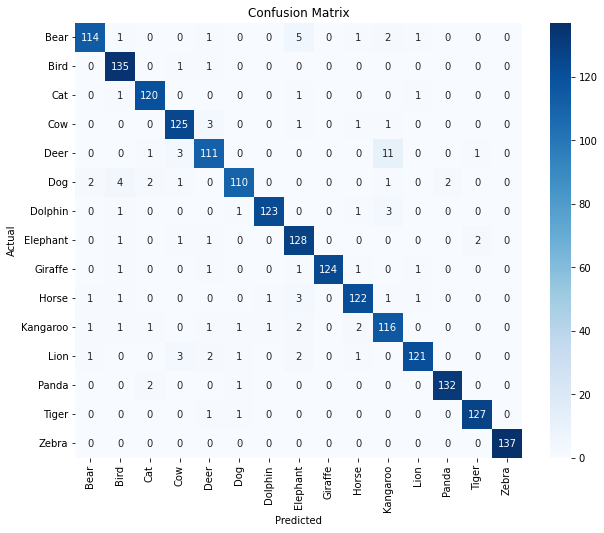

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

        Bear       0.96      0.91      0.93       125
        Bird       0.92      0.99      0.95       137
         Cat       0.95      0.98      0.96       123
         Cow       0.93      0.95      0.94       131
        Deer       0.91      0.87      0.89       127
         Dog       0.96      0.90      0.93       122
     Dolphin       0.98      0.95      0.97       129
    Elephant       0.90      0.96      0.93       133
     Giraffe       1.00      0.96      0.98       129
       Horse       0.95      0.94      0.94       130
    Kangaroo       0.86      0.92      0.89       126
        Lion       0.97      0.92      0.95       131
       Panda       0.99      0.98      0.98       135
       Tiger       0.98      0.98      0.98       129
       Zebra       1.00      1.00      1.00       137

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95   